In [2]:
import jax
import jax.numpy as jnp
import distrax

import matplotlib.pyplot as plt

In [4]:
rng = jax.random.PRNGKey(30)

In [42]:
size = 121
num_envs = 256

mu = 2.4

alphas = 10000.0 * jnp.ones(size)
betas = 1.00000001 * jnp.ones(size)

means = 1.0 * jnp.ones(size)
std = 1.0 * jnp.ones(size)

rng, _rng = jax.random.split(rng)

beta_distr = distrax.Beta(alphas, betas)
clipped_normal_distr = distrax.ClippedNormal(means, std, minimum=-1., maximum=1.)

beta_actions = beta_distr.sample(seed=_rng) * mu
clipped_normal_actions = clipped_normal_distr.sample(seed=_rng) * mu

Beta: mean=2.399773597717285, std=0.00020605009922292084
Clipped Normal: mean=1.5157861709594727, std=1.3008474111557007


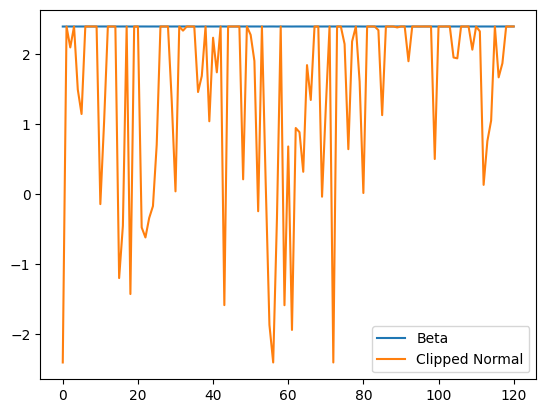

In [43]:
plt.plot(beta_actions, label='Beta')
plt.plot(clipped_normal_actions, label='Clipped Normal')

print(f"Beta: mean={jnp.mean(beta_actions)}, std={jnp.std(beta_actions)}")
print(f"Clipped Normal: mean={jnp.mean(clipped_normal_actions)}, std={jnp.std(clipped_normal_actions)}")

plt.legend()
plt.show()

In [50]:
batch_means = jnp.tile(means, (num_envs, 1))
batch_stds = jnp.tile(std, (num_envs, 1))

pi = distrax.MultivariateNormalDiag(batch_means, batch_stds)
print(pi.event_shape)
print((clipped_normal_distr.event_shape))

(121,)
()


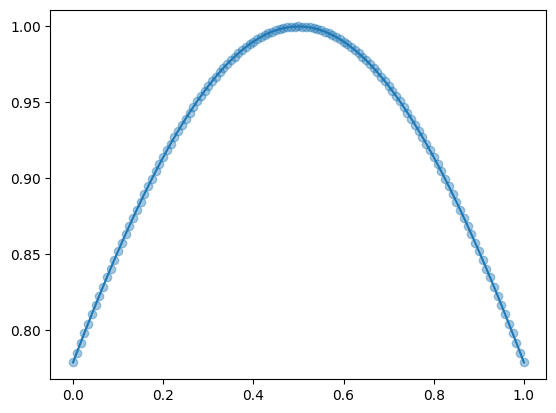

In [6]:
ts = jnp.linspace(0., 1., 121)
waveform = jnp.exp(-(ts - 0.5)**2)
do_nothing_kernel = jnp.ones(1)
conv_waveform = jnp.convolve(waveform, do_nothing_kernel, mode='same')

plt.scatter(ts, waveform, label='initial waveform', alpha=0.4)
plt.plot(ts, conv_waveform, label='convolved with dirac delta waveform')
plt.show()